## Machine Learning Basics

In [ ]:
import matplotlib.pyplot as plt
# Helper plotting functions - just run this cell and we will use these later
def plot_logreg(X, y, y_pred=None, title=""):

  correct = y_pred == y
  incorrect = y_pred != y
  if y_pred is None:
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='o', label='Label 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='m', marker='o', label='Label 1')
  else:
    # Plot correct classifications
    plt.scatter(X[correct & (y_pred==0), 0], X[correct & (y_pred==0), 1], c='r', marker='o', label='Correct Label 0')
    plt.scatter(X[correct & (y_pred==1), 0], X[correct & (y_pred==1), 1], c='m', marker='o', label='Correct Label 1')

    # Plot incorrect classifications
    plt.scatter(X[incorrect & (y_pred==0), 0], X[incorrect & (y_pred==0), 1], c='m', marker='x', s=100, label='Incorrect Label 0')
    plt.scatter(X[incorrect & (y_pred==1), 0], X[incorrect & (y_pred==1), 1], c='r', marker='x', s=100, label='Incorrect Label 1')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(title)
  plt.legend()

def plot_boundary(model, xmin, xmax, ymin, ymax):
  b = model.intercept_[0]
  w1, w2 = model.coef_.T

  c = -b/w2
  m = -w1/w2
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  plt.plot(xd, yd, 'k', lw=1, ls='--')
  plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
  plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

def plot_mlp_decisions(X, model, cmap=plt.cm.RdYlBu, buffer=.5):
  # Create a mesh to plot in
  x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
  y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Predict the function value for the whole grid
  Z = model_neural.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour and training examples
  # plot_logreg(X_test, y_test, y_pred, title="Predictions on Test Data")
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

Let's look at some synthetic data - run the below code. How would you draw a line to separate the data?

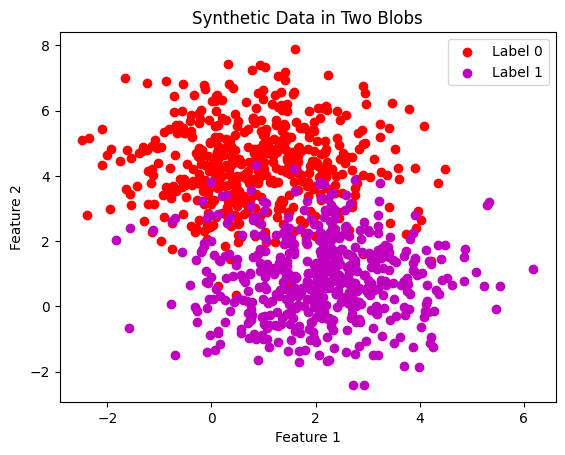

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_circles
import numpy as np
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.30)
y_sort_indices = np.argsort(y)
X = X[y_sort_indices]
y = y[y_sort_indices]


def plot_logreg(X, y, y_pred=None, title="", mode='linear'):

  correct = y_pred == y
  incorrect = y_pred != y
  if y_pred is None:
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='o', label='Label 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='m', marker='o', label='Label 1')
  else:
    # Plot correct classifications
    plt.scatter(X[correct & (y_pred==0), 0], X[correct & (y_pred==0), 1], c='r', marker='o', label='Correct Label 0')
    plt.scatter(X[correct & (y_pred==1), 0], X[correct & (y_pred==1), 1], c='m', marker='o', label='Correct Label 1')

    # Plot incorrect classifications
    plt.scatter(X[incorrect & (y_pred==0), 0], X[incorrect & (y_pred==0), 1], c='m', marker='x', s=100, label='Incorrect Label 0')
    plt.scatter(X[incorrect & (y_pred==1), 0], X[incorrect & (y_pred==1), 1], c='r', marker='x', s=100, label='Incorrect Label 1')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(title)
  plt.legend()

plot_logreg(X, y, title="Synthetic Data in Two Blobs")

## If we know where the data is coming from, we can sometimes come up with an optimal answer! But usually we don't. The main goal of machine learning is to learn what is generating our data so we can infer about unseen circumstances

In [ ]:
center1 = np.mean(X[y==0], axis=0)
center2 = np.mean(X[y==1], axis=0)
midpoint = (center1 + center2) / 2
direction =  (center1 - center2)
direction = -1*direction[0] / direction[1]
intercept = midpoint[1] - direction * midpoint[0]


xd = np.array([-3, 7])
plt.plot(xd, (direction)*xd + intercept, ls=':', label='Optimal Decision Boundary')
plot_logreg(X, y, title="Synthetic Data in Two Blobs")

Remember, we want to learn the _data generating function_ not the data. To do that, a common strategy is to split our data randomly into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we can look at a basic statistical learning package and test some functions

In [ ]:
# First we initialize the model
model_logistic1 = LogisticRegression(random_state = 0)
# Then we "fit" the model - math to learn the data!
model_logistic1.fit(X_train, y_train)
# Now let's evaluate on the test
y_pred = model_logistic1.predict(X_test)

def plot_boundary(model, xmin, xmax, ymin, ymax):
  b = model.intercept_[0]
  w1, w2 = model.coef_.T

  c = -b/w2
  m = -w1/w2
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  plt.plot(xd, yd, 'k', lw=1, ls='--')
  plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
  plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


plt.plot(xd, (direction)*xd + intercept, ls=':', label='Optimal Decision Boundary')
plot_boundary(model_logistic1, -3, 7, -3, 8)
plot_logreg(X_test, y_test, y_pred, title="Predictions on Test Data")

plt.show()

# Now let's look at some key machine learning intuitions that should influence how you set up machine learning problems.
# First, let's take away some of the data of label 2 - will we still learn the same line?

In [ ]:
print(f"Number of examples in label 1: {(y==0).sum()}. Number of examples in label 2: {(y==1).sum()}")

In [ ]:
X_class_imbalance, y_class_imbalance = X[:int(X.shape[0]*.6)], y[:int(y.shape[0]*.6)]
X_train, X_test, y_train, y_test = train_test_split(X_class_imbalance, y_class_imbalance, test_size=0.2, random_state=42)

b, w = model_logistic1.intercept_[0], model_logistic1.coef_[0]
c = -b/w[1]
m = -w[0]/w[1]
xd = np.array([-3, 7])
yd = m*xd + c
plt.plot(xd, yd, 'b', lw=1, ls='--', label="Original Decision Boundary")
# First we initialize the model
model_logistic = LogisticRegression(random_state = 0)
# Then we "fit" the model - math to learn the data!
model_logistic.fit(X_train, y_train)
# Now let's evaluate on the test
y_pred = model_logistic.predict(X_test)

plot_boundary(model_logistic, -3, 7, -3, 8)
plot_logreg(X_test, y_test, y_pred, "Predictions on Test Data")
plt.show()

# What if we repeat our minority label?

In [ ]:
X_minority_class, y_minority_class = X_class_imbalance[y_class_imbalance==1], y_class_imbalance[y_class_imbalance==1]
X_rebalanced = np.concatenate([X_class_imbalance, X_minority_class.repeat(4, axis=0)])
y_rebalanced = np.concatenate([y_class_imbalance, y_minority_class.repeat(4, axis=0)])

X_train, X_test, y_train, y_test = train_test_split(X_rebalanced, y_rebalanced, test_size=0.2, random_state=42)

b, w = model_logistic1.intercept_[0], model_logistic1.coef_[0]
c = -b/w[1]
m = -w[0]/w[1]
xd = np.array([-3, 7])
yd = m*xd + c
plt.plot(xd, yd, 'b', lw=1, ls='--', label="Original Decision Boundary")
# First we initialize the model
model_logistic = LogisticRegression(random_state = 0)
# Then we "fit" the model - math to learn the data!
model_logistic.fit(X_train, y_train)
# Now let's evaluate on the test
y_pred = model_logistic.predict(X_test)

plot_boundary(model_logistic, -3, 7, -3, 8)
plot_logreg(X_test, y_test, y_pred, "Predictions on Test Data")
plt.show()

Let's try again - with circles!

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plot_logreg(X, y, title="Synthetic Data in Two Circles")
plt.show()

In [ ]:
# First we initialize the model
model_logistic = LogisticRegression(random_state = 0)
# Then we "fit" the model - math to learn the data!
model_logistic.fit(X_train, y_train)
# Now let's evaluate on the test
y_pred = model_logistic.predict(X_test)

plot_boundary(model_logistic, -2, 2, -2, 2)

plot_logreg(X_test, y_test, y_pred, title="Predictions on Test Data")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

We hit our first example of getting hit by our choice of _model class_. Logistic regression creates a linear decision boundary to separate the features. Our circles cannot be classified with a straight line! We need a more complicated set of models!

There are many different "simpler" models that could classify this data, but since everybody is using them, let's use a simple neural network, also called an MLP, or Multi Layer Perceptron.

In [ ]:
from sklearn.neural_network import MLPClassifier


The history of neural networks is long and storied, but the basics comes down to this. Imagine we took a bunch of lines and figured out how to stitch them together to separate the inner circle from the outer circle.
For a coherent and beautiful visual tutorial, let's visit: https://playground.tensorflow.org/#activation=relu  

In [ ]:
# Now let's make a new model in code to match the playground
# Reading documentation is a very (!!!) important skill.
# Visit https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# to see how to use the function
# Note: This is considered a very bare-bones neural network library. For "big" data, consider Pytorch

model_neural = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)

# Fit the model
model_neural.fit(X_train, y_train)

# Now let's evaluate on the test
y_pred = model_neural.predict(X_test)

plot_mlp_decisions(X_train, model_neural, buffer=.25)

# Plot the contour and training examples
plot_logreg(X_test, y_test, y_pred, title="Predictions on Test Data")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MLPClassifier Decision Boundary')
plt.show()

... and with class imbalance again

In [ ]:
y_sort_indices = np.argsort(y)
X_train_circles = X[y_sort_indices]
y_train_circles = y[y_sort_indices]

X_train_circles = X_train_circles[:int(X_train_circles.shape[0]*.6)]
y_train_circles = y_train_circles[:int(y_train_circles.shape[0]*.6)]

model_neural = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, shuffle=False)

# Fit the model
model_neural.fit(X_train_circles, y_train_circles)

# Now let's evaluate on the test
y_pred = model_neural.predict(X_test)
plot_mlp_decisions(X_train, model_neural, buffer=.25)

# Plot the contour and training examples
plot_logreg(X_test, y_test, y_pred, title="Predictions on Test Data")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MLPClassifier Decision Boundary')
plt.show()


## Exercise! Let's take some unknown data and figure out how to classify it correctly.
## These are the answers. For the answer-less assignment, switch to: Binary_Classification_Exercise.ipynb

In [ ]:
# Let's load our dataset
import pandas as pd
import numpy as np
data = pd.read_csv('./binary_classification.csv', index_col=False)
data

## 2. Preparing the Data for Classification

---

In [ ]:
# Separate features (X) and target variable (y)
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

## 3. Implementing the Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

class FirstClassModel:
    def __init__(self, model="logistic"):

        self.model_neural = MLPClassifier([50, 10], max_iter=50, verbose=True, tol=.00001, random_state=502, learning_rate_init=0.1)
        self.model_logistic = LogisticRegression(random_state = 0)

        if model == "logistic":
            self.model = self.model_logistic
        elif model == 'neural':
            self.model = self.model_neural

    def fit(self,x,y):

        self.model.fit(x, y)

    def predict_class(self,x):
        ### This method must return an array with size y
        ## whose entries are either 0 or 1#
        y_pred = self.model.predict(x)
        return y_pred


    def predict_probabilities(self,x):
        ### This method must return an array with size y
        ## whose entries denote the "likelihood" that input
        # x belongs to (each) class, with shape (#data points, #classes)
        y_prob = self.model.predict_proba(x)
        return y_prob

    def performance_metrics(self,x,y):
        ### report accuracy, true positive rate, false positive rate
        ## as well as score mean and standard deviation (corresponding to class ONE)
        # ...
        y_pred = self.predict_class(x)
        y_prob = self.predict_probabilities(x)
        yprob_mean = np.mean(y_prob[:,0])
        yprob_stdev = np.std(y_prob[:,0])
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        print(tn, fp, fn, tp)

        accuracy = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        print("Accuracy: ", accuracy)
        print("True Positive Rate: ", tpr)
        print("False Positive Rate: ", fpr)
        print("Score Mean: ", yprob_mean)
        print("Score Standard Deviation: ", yprob_stdev)

        return accuracy, tpr, fpr, yprob_mean, yprob_stdev

In [ ]:
# Step 0: instantiate a model. I've already biased you with
# one in the constructor
fcm = FirstClassModel()

### Step 1:  train model
## will need to define .fit() method of FirstClassModel
# Calling this method will fit parameters of your model
fcm.fit(X,y)

### Step 3: define prediction methods
## one should give the probability associated to class 1, and
# the other the discrete class predictions
y_probs = fcm.predict_probabilities(X)
y_pred = fcm.predict_class(X)

# printing for debugging purposes, not needed
print(y_probs)

### Step 4: define metrics method
## evaluate performance
metrics = fcm.performance_metrics(X,y)

# On to more "complicated" machine learning- how can we give our statistical learning algorithms a hand in learning data that we know has some structure?

## One anwer is convolution for dealing with data that is changing over time or for images. The idea is that data close to each other - in time (for time sequences) or in space (for images or video) should inform each other at multiple scales. Like how we first look for edges in an image which form faces, arms, and other body parts, which become people, which becomes a crowd of people. We want to help our algorithm to find these features at compose them kind of like we do.

1D convolution: https://e2eml.school/convolution_one_d.html

2D convolution: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

In [ ]:
import torch

# To do this, we will implement Pytorch, the most popular neural network library, to classify neural signals

Each column in this data is a recording location from EEG. The goal of this problem is to guess is the eye open or closed?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

def generate_synthetic_eeg(num_samples, num_channels=8, sequence_length=200):
    time = np.linspace(0, 1, sequence_length)
    data = []
    labels = []

    for _ in range(num_samples):
        if np.random.random() > 0.5:  # Eyes open
            alpha_power = np.random.uniform(0.7, .9)
            beta_power = np.random.uniform(1.0, 1.2)
            label = 1
        else:  # Eyes closed
            alpha_power = np.random.uniform(1.0, 1.2)
            beta_power = np.random.uniform(0.7, .9)
            label = 0

        sample = []
        for channel in range(num_channels):
            # Generate alpha waves (8-13 Hz)
            alpha_freq = np.random.uniform(8, 13)
            alpha_amplitude = alpha_power * np.random.uniform(0.5, 1.5)
            alpha_phase = np.random.uniform(0, 2 * np.pi)
            alpha_wave = alpha_amplitude * np.sin(2 * np.pi * alpha_freq * time + alpha_phase)

            # Generate beta waves (13-30 Hz)
            beta_freq = np.random.uniform(13, 30)
            beta_amplitude = beta_power * np.random.uniform(0.5, 1.5)
            beta_phase = np.random.uniform(0, 2 * np.pi)
            beta_wave = beta_amplitude * np.sin(2 * np.pi * beta_freq * time + beta_phase)

            # Combine waves
            combined_wave = alpha_wave + beta_wave

            # Add pink noise
            pink_noise = np.random.normal(0, 1, sequence_length)
            pink_noise = np.cumsum(pink_noise) / np.sqrt(np.arange(1, len(pink_noise) + 1))
            pink_noise = pink_noise / np.std(pink_noise) * 0.1  # Adjust noise level

            channel_data = combined_wave + pink_noise
            sample.append(channel_data)

        data.append(np.array(sample).T)  # Transpose to get (sequence_length, num_channels)
        labels.append(label)

    return np.array(data), np.array(labels)

# Generate synthetic data
num_samples = 2000
num_channels = 20
sequence_length = 200

X, y = generate_synthetic_eeg(num_samples, num_channels, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PyTorch Dataset
class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
batch_size = 32
train_dataset = EEGDataset(X_train, y_train)
test_dataset = EEGDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualize some samples
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sample_idx = np.random.randint(0, len(X))
    plt.plot(X[sample_idx])
    plt.title(f"Eye State: {'Open' if y[sample_idx] == 1 else 'Closed'}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

print(f"Total number of samples: {num_samples}")
print(f"Number of channels: {num_channels}")
print(f"Sequence length: {sequence_length}")
print(f"Shape of a single sample: {X[0].shape}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")
print(f"Number of batches in training set: {len(train_loader)}")
print(f"Number of batches in test set: {len(test_loader)}")

# Our first step in Pytorch is turn turn our data into a _DataLoader_. This helps organize our data in a way that makes it easy to do all the data wrangling the training algorithm has to do.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import accuracy_score

class EEG1DCNN(nn.Module):
    def __init__(self, input_channels, sequence_length):
        super(EEG1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * (sequence_length // 4), 32)
        self.fc2 = nn.Linear(32, 2)  # 2 classes: eyes open or closed
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Change shape to (batch, channels, sequence_length)
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
from tqdm import tqdm
# Hyperparameters
input_channels = num_channels
learning_rate = 0.001
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = EEG1DCNN(input_channels, sequence_length).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_loss = 0.0
        train_predictions, train_labels = [], []

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.squeeze())
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_predictions.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = accuracy_score(train_labels, train_predictions)

        # Validation
        model.eval()
        val_loss = 0.0
        val_predictions, val_labels = [], []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.squeeze())
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_predictions.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = accuracy_score(val_labels, val_predictions)
        train_losses.append(train_loss)
        test_losses.append(val_loss)
        train_accs.append(train_accuracy)
        test_accs.append(val_accuracy)
        if i % 5 == 0:
          print(f'Epoch {epoch+1}/{num_epochs}:')
          print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
          print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
          print('-' * 60)
    return train_losses, test_losses, train_accs, test_accs

# Train the model
train_loss, test_loss, train_accs, test_accs = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs)

# Save the trained model
torch.save(model.state_dict(), 'eeg_1dcnn_model.pth')
print("Model saved as 'eeg_1dcnn_model.pth'")

# Let's plot our train and validation accuracy over time!

---



In [ ]:
# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


# When are we overfitting? What can we do about it?